<a href="https://colab.research.google.com/github/stick35em10/Exemplos_para_os_Testes_de_Hip-teses/blob/Problema%2302/aula_10_exemplos_para_os_testes_de_hip_teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 Apresentação do Problema 02

  #1.0 Apresentação do problema

Pesquisadores gostariam de saber se duas espécies diferentes de plantas tem a mesma
altura média. Eles coletaram amostras aleatórias de 20 plantas de cada espécie.

In [4]:
df1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
df2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

[Visualizar o diagrama com a descrição do problema e como escolheu-se o teste](https://viewer.diagrams.net/?tags=%7B%7D&lightbox=1&highlight=0000ff&edit=_blank&layers=1&nav=1&title=Untitled%20Diagram.drawio&dark=auto#Uhttps%3A%2F%2Fraw.githubusercontent.com%2Fstick35em10%2FExemplos_para_os_Testes_de_Hip-teses%2Fmain%2Fdiagrams%2FUntitled%2520Diagram.drawio)

#3.1 Avaliando os pressupostos sobre os dados

##3.1.1 Aleatoriedade

Conforme a descrição do problema, eles coletaram amostras aleatórias. Deste modo cumpre-se o pressuposto da aleatoriedade dos dados.

##3.1.2 Independência

A verificação da independência dos dados da amostra é crucial para a validade de muitos testes estatísticos. A independência significa que a observação de um dado não influencia a observação de outro.

###3.1.2.1 verificar a independência dos dados

###3.1.2.1.1. Compreensão do Processo de Coleta de Dados:

1. Compreensão do Processo de Coleta de Dados:# New Section

####3.1.2.1 1. Design do Estudo:





*   A forma como os dados foram coletados é fundamental.Amostragem aleatória simples geralmente garante independência.
*   Se os dados foram coletados em clusters (grupos), ou se há uma relação temporal entre as observações, a independência pode ser violada.





Conforme a descricao do problema (1.0), Eles coleta amostras aleatórias, assim sendo podemos assumir que as amostras são independentes.

####3.1.2.1.2. Conhecimento do Domínio:

 Ao selecionar 20 plantas aleatoriamente de cada espécie, assume-se que cada planta é independente das outras. Isso significa que a medição de uma planta não influencia a medição de outra

Em resumo:

**Amostras aleatórias de 20 plantas de cada de cada espécie fornecem dados independentes, permitindo inferências sobre a população.**

###3.1.2.1.2. Testes Estatísticos:

####3.1.2.1.2.1. Teste de Runs:

Este teste é usado para verificar a aleatoriedade em uma sequência de dados binários (dois resultados possíveis).
Ele verifica se há padrões não aleatórios na sequência, o que indicaria falta de

####3.1.2.1.2.2.Teste de Autocorrelação:

Se os dados forem uma série temporal, a autocorrelação verifica se os valores são correlacionados com valores anteriores.
Alta autocorrelação indica falta de independência.

####3.1.2.1.2.3. Teste Qui-Quadrado:

Se você tiver dados categóricos, o teste qui-quadrado pode verificar se há associação entre variáveis. Se não houver associação, isso sugere independência.

###3.1.2.1.3. Métodos Gráficos:

####3.1.2.1.3.1 Gráficos de Dispersão:

*   Se você tiver pares de dados, um gráfico de dispersão pode mostrar se há alguma relação entre as variáveis.
*   Padrões nos dados podem indicar falta de independência.


####3.1.2.1.3.2 Gráficos de Resíduos

Em modelos de regressão, os gráficos de resíduos podem revelar padrões que indicam falta de independência.

###3.1.2.1.2. Testes Estatísticos:

###3.1.2.1.3. Métodos Gráficos:

##3.1.3 Normalidade

###3.1.3.1 Métodos Gráficos

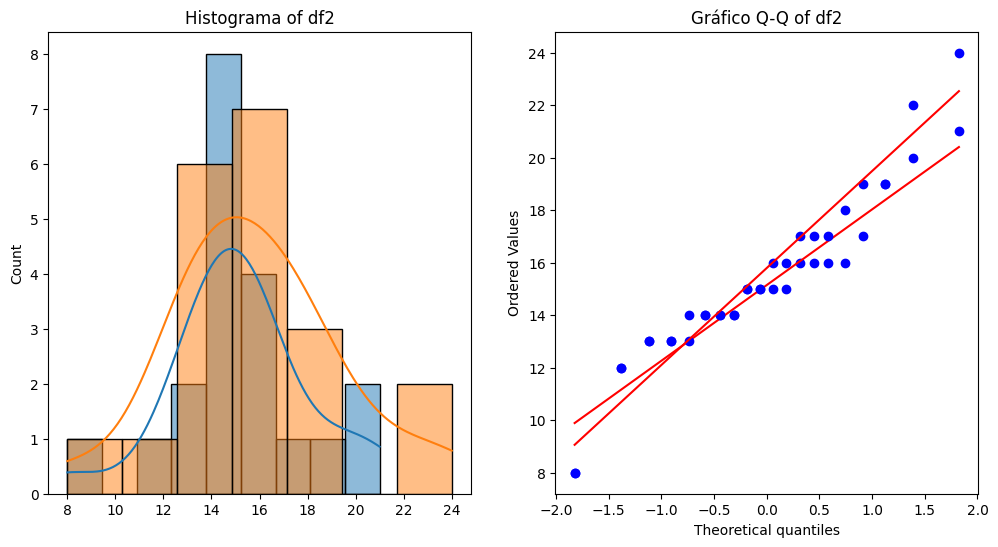

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data1 = df1 #np.random.normal(0, 1, 100) # Dados normalmente distribuídos
data2 = df2
#data = np.random.exponential(1,100) #Dados não normalizados

# Métodos Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data1, kde=True)
plt.title('Histograma of df1')

plt.subplot(1, 2, 2)
stats.probplot(data1, plot=plt)
plt.title('Gráfico Q-Q of df1')

plt.subplot(1, 2, 1)
sns.histplot(data2, kde=True)
plt.title('Histograma of df2')

plt.subplot(1, 2, 2)
stats.probplot(data2, plot=plt)
plt.title('Gráfico Q-Q of df2')

plt.show()



** conforme os gráficos acima os dados sugerem uma distribuição normal, os pontos do gráfico Q-Q seguem aproximadamente uma linha reta, sugerindo que os dados apresentam uma distribuicao normal**

###3.1.3.2 Testes Estatisticos

In [10]:
def teste_de_normalidade( data):
  # Testes Estatísticos
  shapiro_test = stats.shapiro(data)
  print(f'Teste de Shapiro-Wilk: {shapiro_test}')

  kstest_test = stats.kstest(data, 'norm')
  print(f'Teste de Kolmogorov-Smirnov: {kstest_test}')

  dagostino_test = stats.normaltest(data)
  print(f"Teste de D'Agostino-Pearson: {dagostino_test}")

  #Interpretação
  alpha = 0.05

  if shapiro_test.pvalue > alpha:
      print(f"Os dados parecem ser normalmente distribuídos (Shapiro-Wilk)")
  else:
      print(f"Os dados não parecem ser normalmente distribuídos (Shapiro-Wilk)")

  if kstest_test.pvalue > alpha:
      print(f"Os dados parecem ser normalmente distribuídos (Kolmogorov-Smirnov)")
  else:
      print(f"Os dados não parecem ser normalmente distribuídos (Kolmogorov-Smirnov)")

  if dagostino_test.pvalue > alpha:
      print(f"Os dados parecem ser normalmente distribuídos (D'Agostino-Pearson)")
  else:
      print(f"Os dados não parecem ser normalmente distribuídos (D'Agostino-Pearson)")
print('\n Para data1 \n ')
teste_de_normalidade( data1)
print('\n Para data2 \n')
teste_de_normalidade( data2)


 Para data1 
 
Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9387213108652683), pvalue=np.float64(0.226775856925707))
Teste de Kolmogorov-Smirnov: KstestResult(statistic=np.float64(0.9999999999999993), pvalue=np.float64(5.9191534583402946e-304), statistic_location=np.int64(8), statistic_sign=np.int8(-1))
Teste de D'Agostino-Pearson: NormaltestResult(statistic=np.float64(2.3355767704530592), pvalue=np.float64(0.3110541129774462))
Os dados parecem ser normalmente distribuídos (Shapiro-Wilk)
Os dados não parecem ser normalmente distribuídos (Kolmogorov-Smirnov)
Os dados parecem ser normalmente distribuídos (D'Agostino-Pearson)

 Para data2 

Teste de Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9664197621235692), pvalue=np.float64(0.6782103872264504))
Teste de Kolmogorov-Smirnov: KstestResult(statistic=np.float64(0.9999999999999993), pvalue=np.float64(5.9191534583402946e-304), statistic_location=np.int64(8), statistic_sign=np.int8(-1))
Teste de D'Agostino-Pearson: Nor

**# Conclusão**
Quanto a normalidade dos dados, sobre os tres testes aplicados, apenas o teste Kolmogorov-Smirnov não sugere que os dados apresentam distribuição normal, assim sendo consideram que os dados sugerem uma distribuição normal conforme a sugestão dos testes Shapiro-Wilk e D’Agostino-Pearson, como também a sugestão gráfica.

#4.1 Aplicação do Two Sample t-test

In [15]:
import numpy as np
from scipy import stats
alpha=0.05
def two_sample_ttest_equal_var(sample1, sample2, alpha=0.05):
    """
    Executa um teste t de duas amostras independentes (variâncias iguais assumidas).

    Args:
        sample1 (list or numpy.ndarray): Dados da primeira amostra.
        sample2 (list or numpy.ndarray): Dados da segunda amostra.
        alpha (float, optional): Nível de significância. Padrão é 0.05.

    Returns:
        tuple: Estatística t e valor p.
    """

    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    return t_statistic, p_value

# Exemplo de uso:
media1 = np.mean(data1)
media2 = np.mean(data2)
#data = [22, 25, 27, 21, 24, 28, 26, 23, 25, 29] #dados de exemplo

t_statistic, p_value = two_sample_ttest_equal_var(data1, data2)

print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")



# Interpretação do resultado:
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências estatísticas de que as médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências estatísticas de que as médias sejam diferentes.")



# Interpretação do resultado
alpha = 0.05 #nível de significância comum

if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências estatísticas de que a média da amostra é diferente da média populacional.")
else:
    print("Não rejeitou-se a hipótese nula. Não há evidências estatísticas de que a média da amostra seja diferente da média populacional.")
    #print(f"A média é: {media:.2f}")
    print(f"A um nivel significancia de {alpha} Não rejeitamos a hipótese nula. Não há evidências estatísticas de que a média da amostral da populacao1 {media1:.2f} seja diferente da média da populacao2 de {media2:.2f}.")
    print(f"A diferencao de {(media1 - media2):.2f}, entre as  médias {media1:.2f} - {media2:.2f}, resulta da aleatoriedade dos dados. A diferenca não é significativa ao nível de significância de {alpha}.")
    #Segundo o teste a diferença de -0.6666666666666661 entre as médias, resulta da aleatoriedade dos dados e não é significativa ao nível de 0.05.
#Exemplo com numpy arrays
#data_numpy = np.array([22, 25, 27, 21, 24, 28, 26, 23, 25, 29])
#t_statistic_np, p_value_np = one_sample_ttest(data_numpy, popmean)

#print(f"\nEstatística t(numpy): {t_statistic_np}")
#print(f"Valor p(numpy): {p_value_np}")

#if p_value_np < alpha:
#    print("Rejeitamos a hipótese nula(numpy). Há evidências estatísticas de que a média da amostra é diferente da média populacional.")
#else:
#    print("Não rejeitamos a hipótese nula(numpy). Não há evidências estatísticas de que a média da amostra seja diferente da média populacional.")

Estatística t: -0.6337397070250238
Valor p: 0.5300471010405257
Não rejeitamos a hipótese nula. Não há evidências estatísticas de que as médias sejam diferentes.
Não rejeitou-se a hipótese nula. Não há evidências estatísticas de que a média da amostra seja diferente da média populacional.
A um nivel significancia de 0.05 Não rejeitamos a hipótese nula. Não há evidências estatísticas de que a média da amostral da populacao1 15.15 seja diferente da média da populacao2 de 15.80.
A diferencao de -0.65, entre as  médias 15.15 - 15.80, resulta da aleatoriedade dos dados. A diferenca não é significativa ao nível de significância de 0.05.
